In [13]:
# Imports
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from clean_data import load_and_clean_data
from preprocess_data import preprocess_data
import Datasets
# Paths to data
properties_2016_path = '../source_code/Datasets/properties_2016.csv'
train_2016_path = '../source_code/Datasets/train_2016_v2.csv'
properties_2017_path = '../source_code/Datasets/properties_2017.csv'
train_2017_path = '../source_code/Datasets/train_2017.csv'

# Load and clean data
df_train = load_and_clean_data(properties_2016_path, train_2016_path, properties_2017_path, train_2017_path)


In [14]:
# Preprocess the data
X_processed, y, preprocessor = preprocess_data(df_train)


In [15]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)


Ridge Regression - Train MAE: 0.06954302875659454
Ridge Regression - Test MAE: 0.0706964642993421
Ridge Regression - Train MSE: 0.026799470140818803
Ridge Regression - Test MSE: 0.02860070507923168
Ridge Regression - Train R2: 0.012923813935994066
Ridge Regression - Test R2: 0.00303577380110287
Lasso Regression - Train MAE: 0.06922604000590965
Lasso Regression - Test MAE: 0.07007373972525195
Lasso Regression - Train MSE: 0.02715035629385655
Lasso Regression - Test MSE: 0.028690584491173593
Lasso Regression - Train R2: 0.0
Lasso Regression - Test R2: -9.724540697764184e-05


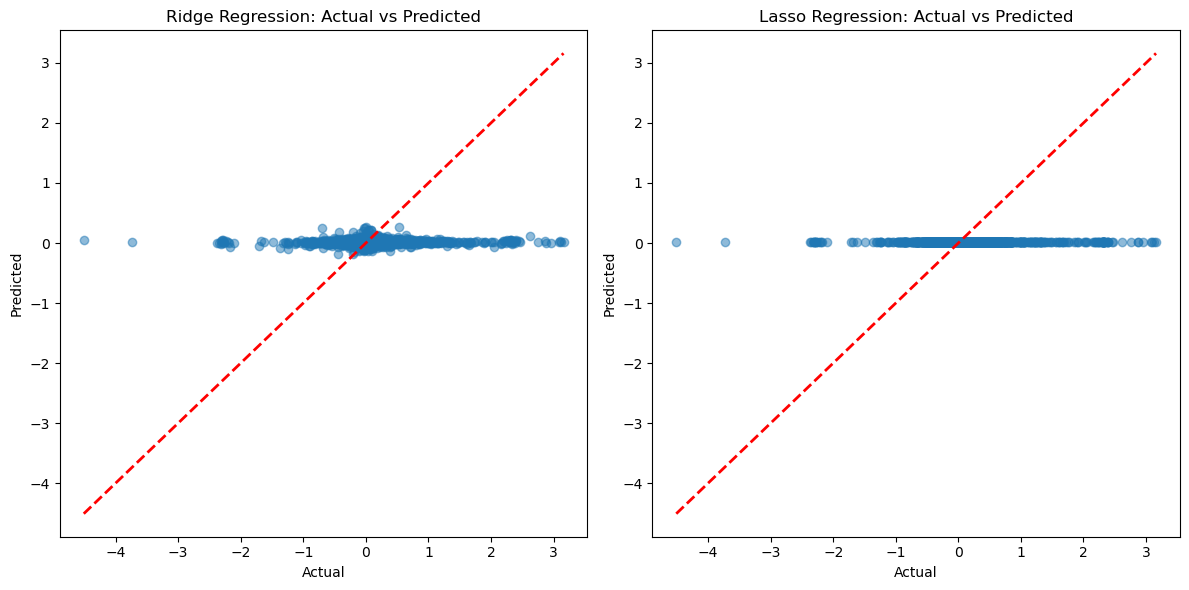

In [16]:

# Initialize and train Ridge and Lasso models
ridge_model = Ridge(alpha=1.0)  # You can adjust alpha
lasso_model = Lasso(alpha=0.1)  # You can adjust alpha

ridge_model.fit(X_train, y_train)
lasso_model.fit(X_train, y_train)

# Make predictions
y_pred_train_ridge = ridge_model.predict(X_train)
y_pred_test_ridge = ridge_model.predict(X_test)

y_pred_train_lasso = lasso_model.predict(X_train)
y_pred_test_lasso = lasso_model.predict(X_test)

# Evaluate Ridge model
mae_train_ridge = mean_absolute_error(y_train, y_pred_train_ridge)
mae_test_ridge = mean_absolute_error(y_test, y_pred_test_ridge)
mse_train_ridge = mean_squared_error(y_train, y_pred_train_ridge)
mse_test_ridge = mean_squared_error(y_test, y_pred_test_ridge)
r2_train_ridge = r2_score(y_train, y_pred_train_ridge)
r2_test_ridge = r2_score(y_test, y_pred_test_ridge)

print(f"Ridge Regression - Train MAE: {mae_train_ridge}")
print(f"Ridge Regression - Test MAE: {mae_test_ridge}")
print(f"Ridge Regression - Train MSE: {mse_train_ridge}")
print(f"Ridge Regression - Test MSE: {mse_test_ridge}")
print(f"Ridge Regression - Train R2: {r2_train_ridge}")
print(f"Ridge Regression - Test R2: {r2_test_ridge}")

# Evaluate Lasso model
mae_train_lasso = mean_absolute_error(y_train, y_pred_train_lasso)
mae_test_lasso = mean_absolute_error(y_test, y_pred_test_lasso)
mse_train_lasso = mean_squared_error(y_train, y_pred_train_lasso)
mse_test_lasso = mean_squared_error(y_test, y_pred_test_lasso)
r2_train_lasso = r2_score(y_train, y_pred_train_lasso)
r2_test_lasso = r2_score(y_test, y_pred_test_lasso)

print(f"Lasso Regression - Train MAE: {mae_train_lasso}")
print(f"Lasso Regression - Test MAE: {mae_test_lasso}")
print(f"Lasso Regression - Train MSE: {mse_train_lasso}")
print(f"Lasso Regression - Test MSE: {mse_test_lasso}")
print(f"Lasso Regression - Train R2: {r2_train_lasso}")
print(f"Lasso Regression - Test R2: {r2_test_lasso}")

# Optionally, you can visualize the results
plt.figure(figsize=(12, 6))

# Ridge Model
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_test_ridge, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Ridge Regression: Actual vs Predicted')

# Lasso Model
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_test_lasso, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Lasso Regression: Actual vs Predicted')

plt.tight_layout()
plt.show()


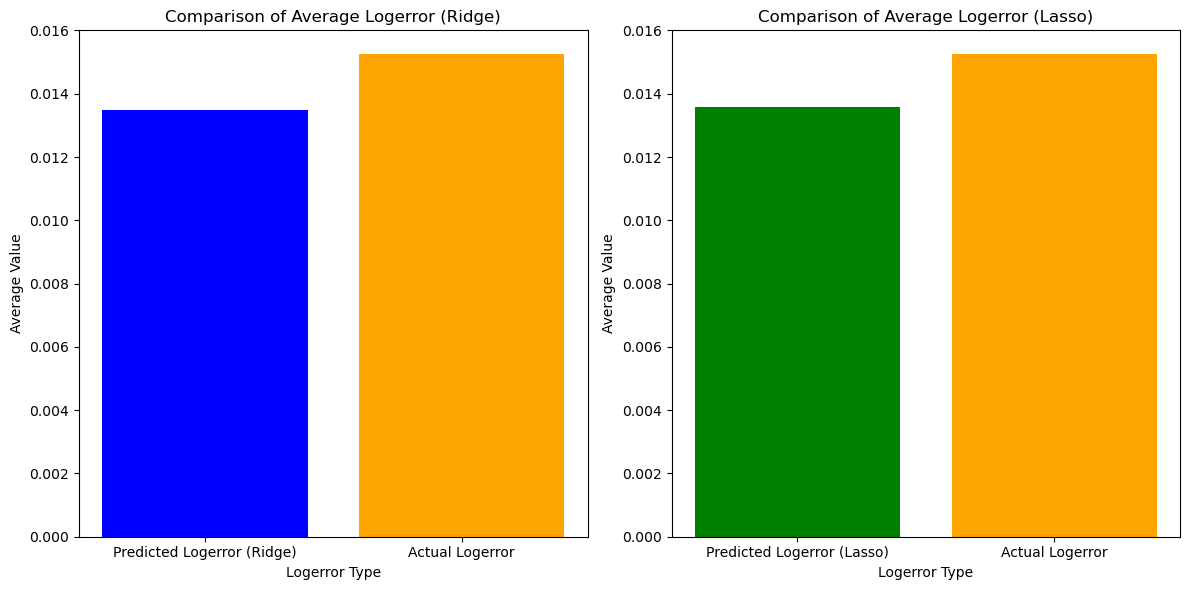

Percentage Difference in Average Logerror (Ridge): -11.50%
Percentage Difference in Average Logerror (Lasso): -10.96%


In [23]:
# Calculate average logerror for Ridge and Lasso models
avg_predicted_logerror_ridge = y_pred_test_ridge.mean()
avg_actual_logerror = y_test.mean()  # Actual logerror remains the same for both

avg_predicted_logerror_lasso = y_pred_test_lasso.mean()

# Optional: Plot comparison of average logerror for Ridge and Lasso
plt.figure(figsize=(12, 6))

# Ridge
plt.subplot(1, 2, 1)
plt.bar(['Predicted Logerror (Ridge)', 'Actual Logerror'], [avg_predicted_logerror_ridge, avg_actual_logerror], color=['blue', 'orange'])
plt.xlabel('Logerror Type')
plt.ylabel('Average Value')
plt.title('Comparison of Average Logerror (Ridge)')

# Lasso
plt.subplot(1, 2, 2)
plt.bar(['Predicted Logerror (Lasso)', 'Actual Logerror'], [avg_predicted_logerror_lasso, avg_actual_logerror], color=['green', 'orange'])
plt.xlabel('Logerror Type')
plt.ylabel('Average Value')
plt.title('Comparison of Average Logerror (Lasso)')

plt.tight_layout()
plt.show()

# Calculate the percentage difference for Ridge and Lasso
percentage_diff_ridge = ((avg_predicted_logerror_ridge - avg_actual_logerror) / avg_actual_logerror) * 100
percentage_diff_lasso = ((avg_predicted_logerror_lasso - avg_actual_logerror) / avg_actual_logerror) * 100

print(f"Percentage Difference in Average Logerror (Ridge): {percentage_diff_ridge:.2f}%")
print(f"Percentage Difference in Average Logerror (Lasso): {percentage_diff_lasso:.2f}%")


In [25]:
# Feature importance plot
importances = ridge_model.feature_importances_
features = preprocessor.get_feature_names_out()
sorted_indices = importances.argsort()[::-1]
top_indices = sorted_indices[:20]  # Top 20 features

plt.figure(figsize=(12, 8))
plt.barh(range(len(top_indices)), importances[top_indices], align='center')
plt.yticks(range(len(top_indices)), [features[i] for i in top_indices])
plt.xlabel('Feature Importance')
plt.title('Top 20 Feature Importances')
plt.grid(True)
plt.show()


AttributeError: 'Ridge' object has no attribute 'feature_importances_'